<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/Curado_de_base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python script based on the implementation of paper: Sánchez-Cruz N, Pilón-Jiménez BA and Medina-Franco JL. Functional group and diversity analysis of BIOFACQUIM: A Mexican natural product database. F1000Research 2020, 8(Chem Inf Sci):2071 DOI:[10.12688/f1000research.21540](https://doi.org/10.12688/f1000research.21540.2).                                                                        [GitHub](https://github.com/DIFACQUIM/IFG_General/blob/master/Compounds_Curation.py)  

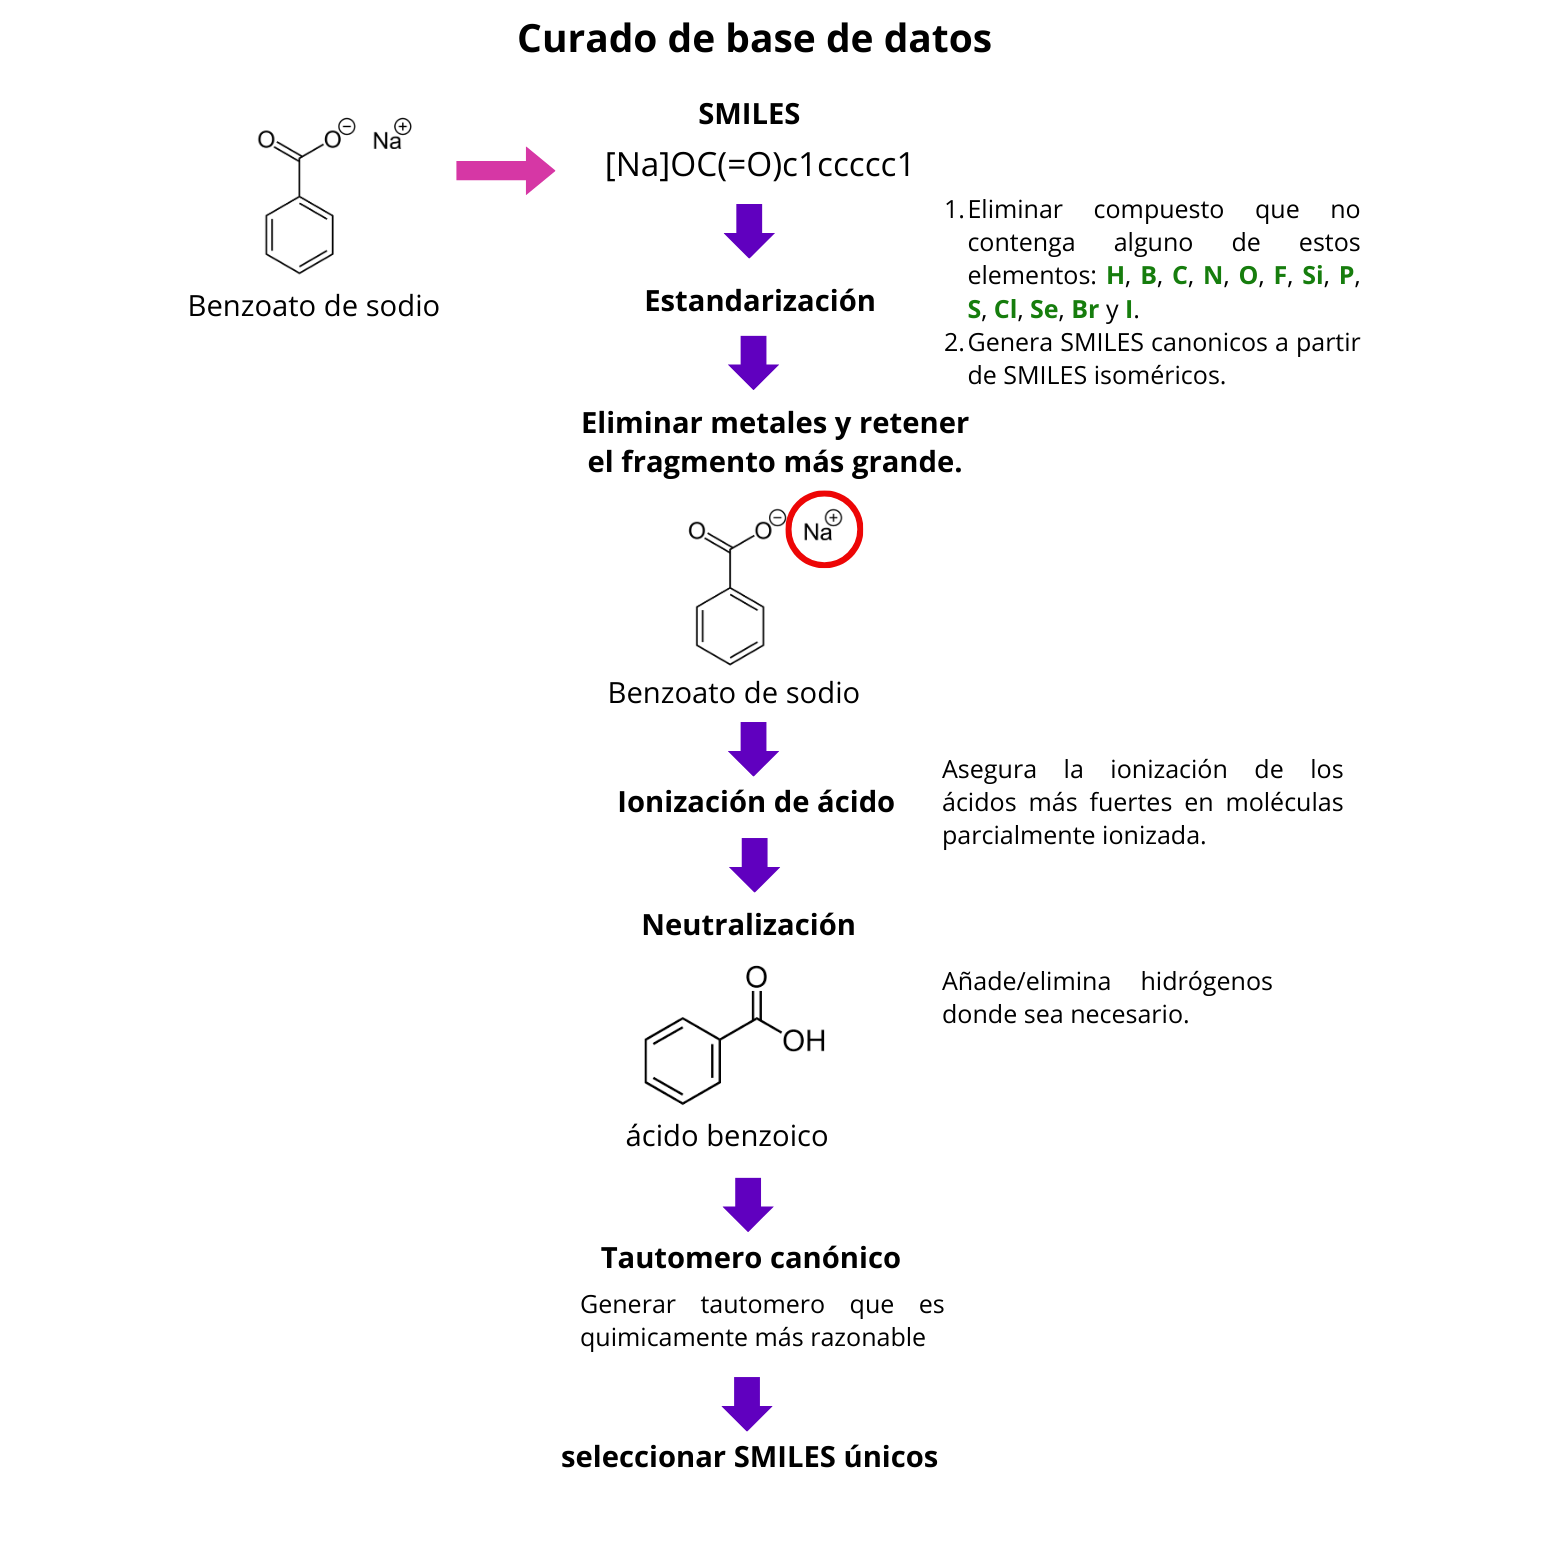

In [1]:
!pip install -q rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 37.1 MB/s eta 0:00:00


In [2]:
!pip install -q molvs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry

In [4]:
#DNMT1
url_dnmt1 = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/DNMT1.csv"
DNMT1 = pd.read_csv(url_dnmt1)
DNMT1.head(2)  # Muestra las dos primeras filas de información, para corroborar que cargó la información correctamente

,"""Molecule ChEMBL ID",Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value
0,"""CHEMBL2336409",NaN,0,461.53,1,5.65,Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...,IC50,'=',11220.0,nM,4.95
1,"""CHEMBL1916683",NaN,0,261.28,0,1.45,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,IC50,'=',310000.0,nM,NaN


In [5]:
set(list(DNMT1["Molecule Name"]))

{'AZACITIDINE',
 'BENZANTHRONE',
 'CEPHALOTHIN',
 'DAPHNORIN',
 'DECITABINE',
 'Dichlon',
 'EPIGALOCATECHIN GALLATE',
 'GENISTEIN',
 'PROCAINAMIDE',
 'PSAMMAPLIN A',
 'S-ADENOSYLHOMOCYSTEINE',
 'VORINOSTAT',
 nan}

In [6]:
print(DNMT1.columns)

Index(['"Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Smiles',
       'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value'],
      dtype='object')


In [7]:
#Select SMILES_chiral column
DNMT1 = DNMT1[['"Molecule ChEMBL ID',"Smiles",'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value']]
DNMT1

,"""Molecule ChEMBL ID",Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value
0,"""CHEMBL2336409",Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...,IC50,'=',11220.0,nM,4.95
1,"""CHEMBL1916683",CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,IC50,'=',310000.0,nM,NaN
2,"""CHEMBL3109075",O=C(O)[C@@H]1[C@H](Cc2c[nH]c3ccccc23)CCN1C(=O)...,IC50,'=',128000.0,nM,NaN
3,"""CHEMBL3109080",O=C(O)[C@H](Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O,IC50,'=',230000.0,nM,NaN
4,"""CHEMBL3126645",Cc1cc(Nc2ccc(NC(=O)c3cccc(Nc4ccnc5ccccc45)c3)c...,IC50,'=',265000.0,nM,NaN
...,...,...,...,...,...,...,...
466,"""CHEMBL4866673",COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...,IC50,'=',2570.0,nM,5.59
467,"""CHEMBL4871621",COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,IC50,'>',10.0,nM,NaN
468,"""CHEMBL4878570",O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,IC50,'=',2020.0,nM,5.70
469,"""CHEMBL4454542",COc1cc2c(cc1OCCCN1CCCC1)N=C(C1CCCCC1)CN=C2NC1C...,IC50,'=',3100.0,nM,5.51


In [8]:
DNMT1.columns = ['Molecule ChEMBL ID',"Smiles",'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value']

In [9]:
DNMT1

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value
0,"""CHEMBL2336409",Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...,IC50,'=',11220.0,nM,4.95
1,"""CHEMBL1916683",CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,IC50,'=',310000.0,nM,NaN
2,"""CHEMBL3109075",O=C(O)[C@@H]1[C@H](Cc2c[nH]c3ccccc23)CCN1C(=O)...,IC50,'=',128000.0,nM,NaN
3,"""CHEMBL3109080",O=C(O)[C@H](Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O,IC50,'=',230000.0,nM,NaN
4,"""CHEMBL3126645",Cc1cc(Nc2ccc(NC(=O)c3cccc(Nc4ccnc5ccccc45)c3)c...,IC50,'=',265000.0,nM,NaN
...,...,...,...,...,...,...,...
466,"""CHEMBL4866673",COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...,IC50,'=',2570.0,nM,5.59
467,"""CHEMBL4871621",COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,IC50,'>',10.0,nM,NaN
468,"""CHEMBL4878570",O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,IC50,'=',2020.0,nM,5.70
469,"""CHEMBL4454542",COc1cc2c(cc1OCCCN1CCCC1)N=C(C1CCCCC1)CN=C2NC1C...,IC50,'=',3100.0,nM,5.51


In [10]:
#Select five compounds
#DNMT1 = DNMT1.iloc[:5,:]
DNMT1.shape

(471, 7)

In [11]:
# Define functions
STD = Standardizer() # Get the standardized version of a given SMILES string (canonical SMILES).
LFC = LargestFragmentChooser() # Select the largest fragment from a salt (ionic compound).
UC = Uncharger() # Charge corrections are applied to ensure, for example, that free metals are correctly ionized.
RI = Reionizer() # Neutralize molecule by adding/removing hydrogens.
TC = TautomerCanonicalizer()  # Return a tautormer “reasonable” from a chemist’s point, but isn’t guaranteed to be the most energetically favourable.

In [12]:
def pretreatment(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        if mol == None:
            #If rdkit could not parse the smiles, returns Error 1
            return "Error 1"
        else:
            mol = STD(mol)
            mol = LFC(mol)

            allowed_elements = {"H","B","C","N","O","F","Si","P","S","Cl","Se","Br","I"}
            actual_elements = set([atom.GetSymbol() for atom in mol.GetAtoms()])
            if len(actual_elements-allowed_elements) == 0:
                mol = UC(mol)
                mol = RI(mol)
                RemoveStereochemistry(mol)
                mol = TC(mol)
                return Chem.MolToSmiles(mol)
            else:
                # If molecule contains other than the allowed elements, return "Error 2"
                return "Error 2"
    except:
        return "Something else was found"

In [13]:
DNMT1["NEW_SMILES"] = [pretreatment(x) for x in DNMT1["Smiles"]]
DNMT1

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,NEW_SMILES
0,"""CHEMBL2336409",Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...,IC50,'=',11220.0,nM,4.95,Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...
1,"""CHEMBL1916683",CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,IC50,'=',310000.0,nM,NaN,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1
2,"""CHEMBL3109075",O=C(O)[C@@H]1[C@H](Cc2c[nH]c3ccccc23)CCN1C(=O)...,IC50,'=',128000.0,nM,NaN,O=C(O)C1C(Cc2c[nH]c3ccccc23)CCN1C(=O)c1ccc2ccc...
3,"""CHEMBL3109080",O=C(O)[C@H](Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O,IC50,'=',230000.0,nM,NaN,O=C(O)C(Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O
4,"""CHEMBL3126645",Cc1cc(Nc2ccc(NC(=O)c3cccc(Nc4ccnc5ccccc45)c3)c...,IC50,'=',265000.0,nM,NaN,Cc1cc(=Nc2ccc(NC(=O)c3cccc(N=c4cc[nH]c5ccccc45...
...,...,...,...,...,...,...,...,...
466,"""CHEMBL4866673",COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...,IC50,'=',2570.0,nM,5.59,COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...
467,"""CHEMBL4871621",COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,IC50,'>',10.0,nM,NaN,COc1cc2[nH]c(-c3ccc(C)s3)cc(=NCC3CCN(c4ncc(C(O...
468,"""CHEMBL4878570",O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,IC50,'=',2020.0,nM,5.70,ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...
469,"""CHEMBL4454542",COc1cc2c(cc1OCCCN1CCCC1)N=C(C1CCCCC1)CN=C2NC1C...,IC50,'=',3100.0,nM,5.51,COc1cc2c(cc1OCCCN1CCCC1)=NC(C1CCCCC1)C=NC=2NC1...


In [14]:
# Delate smiles that rdkit could not read
DNMT1 = DNMT1[DNMT1["NEW_SMILES"] != "Error 1"]
# Delate smiles that no contain allowed atoms
DNMT1 = DNMT1[DNMT1["NEW_SMILES"] != "Error 2"]
# Delate other errors
DNMT1 = DNMT1[DNMT1["NEW_SMILES"] != "Something else was found"].reset_index(drop=True)

In [15]:
# Delete duplicates
DNMT1 = DNMT1.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
DNMT1

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,NEW_SMILES
0,"""CHEMBL2336409",Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...,IC50,'=',11220.0,nM,4.95,Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...
1,"""CHEMBL1916683",CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,IC50,'=',310000.0,nM,NaN,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1
2,"""CHEMBL3109075",O=C(O)[C@@H]1[C@H](Cc2c[nH]c3ccccc23)CCN1C(=O)...,IC50,'=',128000.0,nM,NaN,O=C(O)C1C(Cc2c[nH]c3ccccc23)CCN1C(=O)c1ccc2ccc...
3,"""CHEMBL3109080",O=C(O)[C@H](Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O,IC50,'=',230000.0,nM,NaN,O=C(O)C(Cc1csc2ccccc12)N1C(=O)c2ccccc2C1=O
4,"""CHEMBL3126645",Cc1cc(Nc2ccc(NC(=O)c3cccc(Nc4ccnc5ccccc45)c3)c...,IC50,'=',265000.0,nM,NaN,Cc1cc(=Nc2ccc(NC(=O)c3cccc(N=c4cc[nH]c5ccccc45...
...,...,...,...,...,...,...,...,...
413,"""CHEMBL4850570",COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,IC50,'>',10.0,nM,NaN,COc1cc2[nH]c(-c3cc(C)oc3C)cc(=NCC3CCN(c4ncc(C(...
414,"""CHEMBL4866673",COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...,IC50,'=',2570.0,nM,5.59,COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...
415,"""CHEMBL4871621",COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,IC50,'>',10.0,nM,NaN,COc1cc2[nH]c(-c3ccc(C)s3)cc(=NCC3CCN(c4ncc(C(O...
416,"""CHEMBL4878570",O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,IC50,'=',2020.0,nM,5.70,ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...


In [16]:
# Delete rows with NaN (Not a Number) and None values from pandas DataFrame.
DNMT1 = DNMT1.dropna()

In [17]:
DNMT1

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,NEW_SMILES
0,"""CHEMBL2336409",Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)c...,IC50,'=',11220.0,nM,4.95,Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...
5,"""CHEMBL1361703",COc1ccccc1CNC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12,IC50,'=',7110.0,nM,5.15,COc1ccccc1CNC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12
6,"""CHEMBL1322848",COc1ccc(S(=O)(=O)N2CCN(C(=O)c3cc4c(s3)CCC4)CC2...,IC50,'=',11300.0,nM,4.95,COc1ccc(S(=O)(=O)N2CCN(C(=O)c3cc4c(s3)CCC4)CC2...
7,"""CHEMBL1373655",CC1=NN(c2cccc(C(=O)O)c2)C(=O)/C1=C\C=C\c1ccco1,IC50,'=',1180.0,nM,5.93,C=c1[nH]n(-c2cccc(C(=O)O)c2)c(=O)c1=CC=Cc1ccco1
8,"""CHEMBL1529285",O=C(O)c1ccc(NS(=O)(=O)c2ccc3c(c2)C2C=CCC2C(c2c...,IC50,'=',10100.0,nM,5.00,O=C(O)c1ccc(NS(=O)(=O)c2ccc3c(c2)C2C=CCC2C(c2c...
...,...,...,...,...,...,...,...,...
411,"""CHEMBL4164497",COc1cc2c(NC3CCN(C)CC3)cc(-c3cccnc3)nc2cc1OCCCN...,IC50,'=',1410.0,nM,5.85,COc1cc2c(=NC3CCN(C)CC3)cc(-c3cccnc3)[nH]c2cc1O...
412,"""CHEMBL4163329",COc1cc2c(NC3CCNCC3)cc(-c3ccc(C)o3)nc2cc1OCCCN1...,IC50,'=',137.0,nM,6.86,COc1cc2c(=NC3CCNCC3)cc(-c3ccc(C)o3)[nH]c2cc1OC...
414,"""CHEMBL4866673",COc1cc2c(NCc3ccc(-c4ccc(C(=O)NO)cc4)cc3)cc(-c3...,IC50,'=',2570.0,nM,5.59,COc1cc2c(=NCc3ccc(-c4ccc(C(O)=NO)cc4)cc3)cc(-c...
416,"""CHEMBL4878570",O=C(NO)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...,IC50,'=',2020.0,nM,5.70,ON=C(O)C1CCN(CC(O)COC(Cn2c3ccccc3c3ccccc32)Cn2...


In [18]:
DNMT1.to_csv("DNMT1_curada.csv", sep=",", index=False)